In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
#matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pdb
#import ipdb
import h5py
import importlib
import pickle
import math

# Add root folder to sys path
sys.path.append("../")

from load_expert_traj import recursively_save_dict_contents_to_group

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

sns.set()

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Import own modules
# Need to use importlib since module starts with a numerical value.

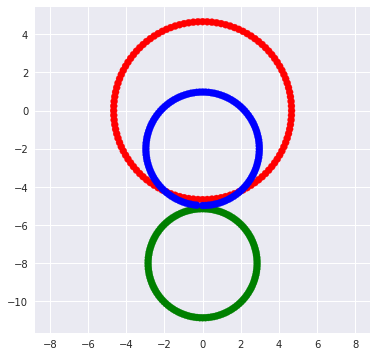

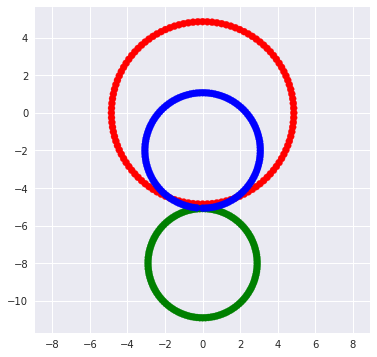

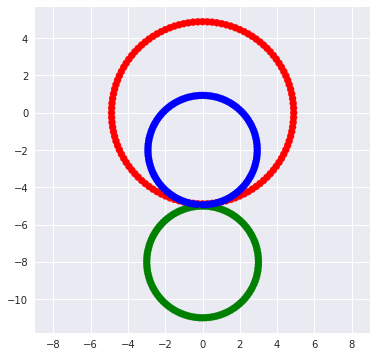

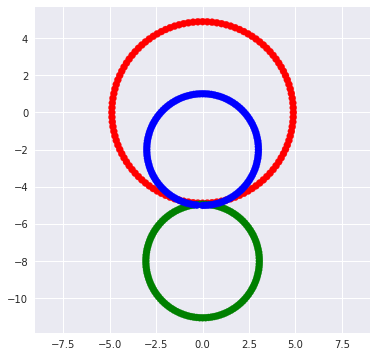

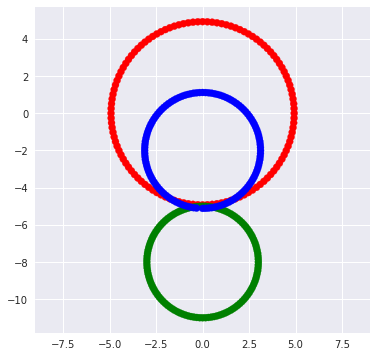

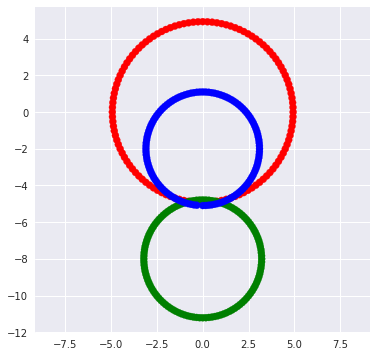

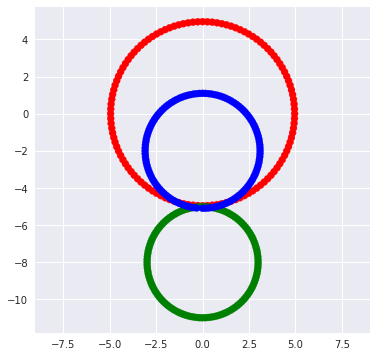

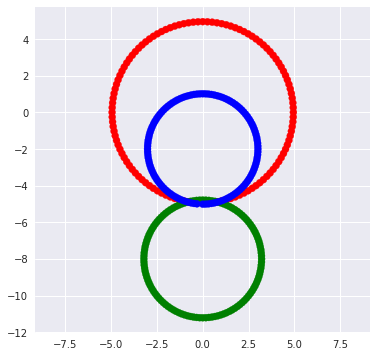

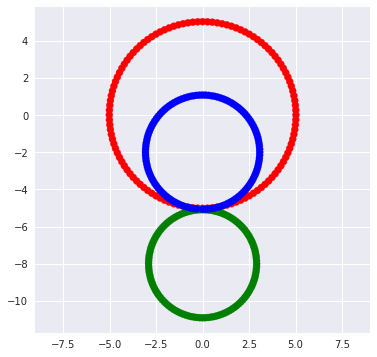

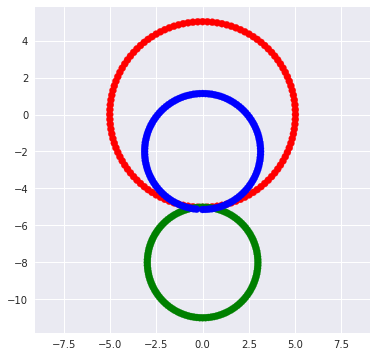

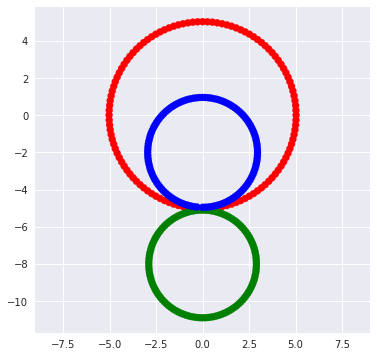

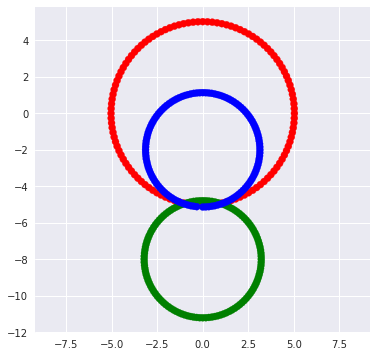

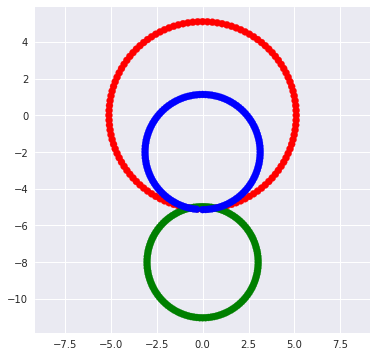

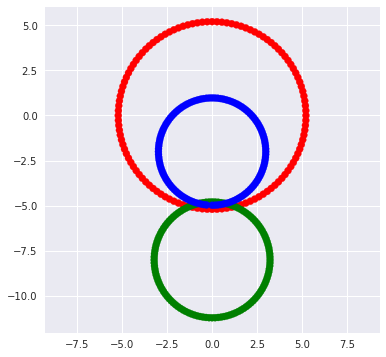

In [ ]:
h5_path = '../h5_trajs/circle_trajs/meta_2_traj_40/expert_traj.h5'
h5_f = h5py.File(h5_path, 'r')
for traj_key in h5_f['expert_traj'].keys():
    states = h5_f['expert_traj'][traj_key]['state']
    action = h5_f['expert_traj'][traj_key]['action']
    goal = h5_f['expert_traj'][traj_key]['goal']
    
    assert states.shape[0] == 359
    
    states_from_actions = [[states[0, 0], states[0, 1]]]
    for i in range(action.shape[0]):
        prev_state = states_from_actions[-1]
        next_state = [prev_state[0] + action[i, 0], prev_state[1] + action[i, 1]]
        states_from_actions.append(next_state)
    state_from_action_arr = np.array(states_from_actions)
    
    colors = ['r'] * 120 + ['g'] * 120 + ['b'] * 119
    # plt.scatter(states[:, 0], states[:, 1], color=colors)
    plt.scatter(state_from_action_arr[:-1, 0].tolist(),
                state_from_action_arr[:-1, 1].tolist(),
                color=colors)
    plt.axis('equal')    
    plt.show()

h5_f.close()